# Getting started with postprocessing: Scalar data

Required modules in postcactus package

In [1]:
import numpy as np
from postcactus.simdir import SimDir

We will use matplotlib for plotting. Instead of plain import we use Jupyter magic (%) for easy notebook integration:  

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

All simulation data is accessed via a SimDir object

In [2]:
example_data = "~/bns_minimal_example"
sd = SimDir(example_data)

Scalar data: min, max, average, infnorm, norm1, norm2, scalar

Accessed via sd.ts

In [6]:
print(sd.ts.max)


Available max timeseries:
['swap_used_mb', 'maxrss_mb', 'grid_arrays', 'dens_unbnd', 'H', 'w_lorentz', 'eps', 'rflux_unbnd', 'grid_structure', 'entropy', 'rho', 'u_t', 'Theta', 'Y_e', 'metadata', 'grid_functions', 'detgij', 'alp', 'temperature']



In [7]:
rho_max = sd.ts.max['rho']

Alternative syntax (good for interactive work, tab-completion of available data)


In [13]:
alp_min = sd.ts.min.fields.alp

Scalar data returned as TimeSeries object

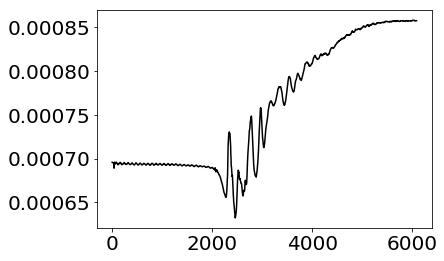

In [32]:
plt.plot(rho_max.t, rho_max.y, 'k-');

Smoothing with gaussian filter, smoothing length 500

In [29]:
sm_alp = alp_min.gaussian_filter(500)

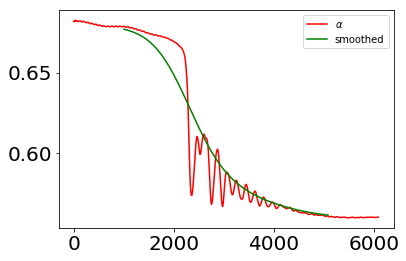

In [31]:
plt.plot(alp_min.t, alp_min.y, 'r-', label=r'$\alpha$')
plt.plot(sm_alp.t, sm_alp.y, 'g-', label='smoothed')
plt.legend();


Derivatives:

In [27]:
dtalp = alp_min.deriv(1)
sm_dt_alp = alp_min.gaussian_filter(100., deriv=1)


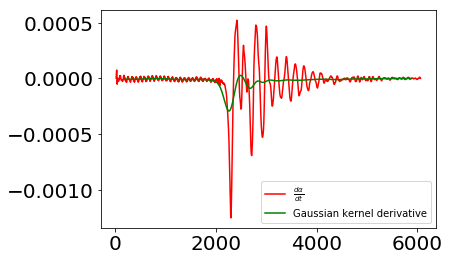

In [33]:
plt.plot(dtalp.t, dtalp.y, 'r-', label=r'$\frac{d\alpha}{dt}$')
plt.plot(sm_dt_alp.t, sm_dt_alp.y, 'g-', label='Gaussian kernel derivative')
plt.legend();

See other examples for 1D and 2D data and GW signal